# 🖼️ PRÉTRAITEMENT DES IMAGES - DÉVELOPPEMENT ET TESTS

Ce notebook permet de développer et tester les fonctions de prétraitement d'images étape par étape avec visualisation.

**Objectif** : Améliorer le prétraitement des images pour le projet CBIR E-commerce


## 📦 ÉTAPE 1 : IMPORTS ET CONFIGURATION


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageOps, ExifTags
import matplotlib.pyplot as plt
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration
TARGET_SIZE = (224, 224)
ALLOWED_FORMATS = {'.png', '.jpg', '.jpeg', '.webp', '.PNG', '.JPG', '.JPEG', '.WEBP'}

print("✅ Imports réussis")


✅ Imports réussis


## 📂 ÉTAPE 2 : CHARGER DES IMAGES DE TEST


✅ Image chargée : ../public/image2.jpg
   Dimensions : (182, 276, 3)


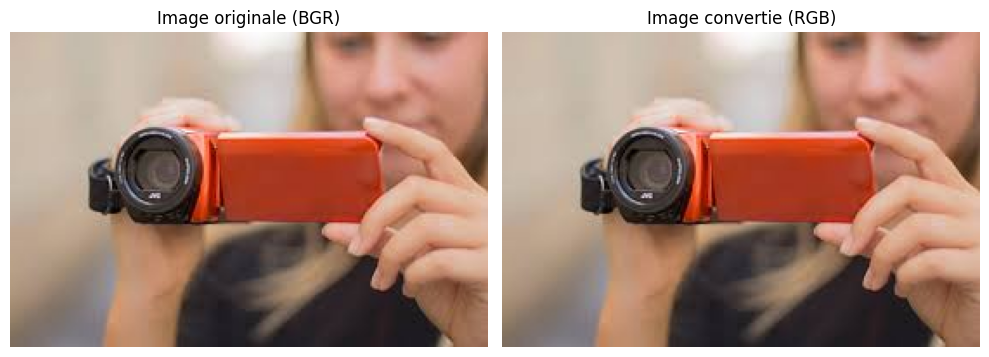

In [ ]:
# Chemins vers les images de test
# Remplacez par vos propres images de test
test_images = [
    "../public/image2.jpg",  # Image de test 1
    "../public/placeholder.svg",   # Image de test 2
    "../public/téléchargement (24).jpg"
]

# Fonction pour charger une image
def load_test_image(image_path):
    """Charge une image pour les tests"""
    if not os.path.exists(image_path):
        print(f"⚠️ Image non trouvée : {image_path}")
        return None
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Impossible de charger l'image : {image_path}")
        return None
    
    return image

# Charger une image de test
test_image_path = test_images[0] if os.path.exists(test_images[0]) else None

if test_image_path:
    original_image = load_test_image(test_image_path)
    if original_image is not None:
        print(f"✅ Image chargée : {test_image_path}")
        print(f"   Dimensions : {original_image.shape}")
        
        # Afficher l'image originale
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Image originale (BGR)")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.title("Image convertie (RGB)")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ Aucune image de test trouvée. Créez une image de test ou utilisez une image existante.")


## 🔍 COMPARAISON BGR vs RGB - VOIR LA DIFFÉRENCE

Cette cellule montre clairement la différence entre BGR et RGB avec une image de test colorée.


🔍 COMPARAISON BGR vs RGB

1️⃣ Création d'une image de test avec couleurs vives...
   ✅ Image de test créée : Rouge | Vert | Bleu (en BGR)

2️⃣ Affichage BGR (sans conversion) - matplotlib interprète comme RGB...
3️⃣ Conversion BGR → RGB...


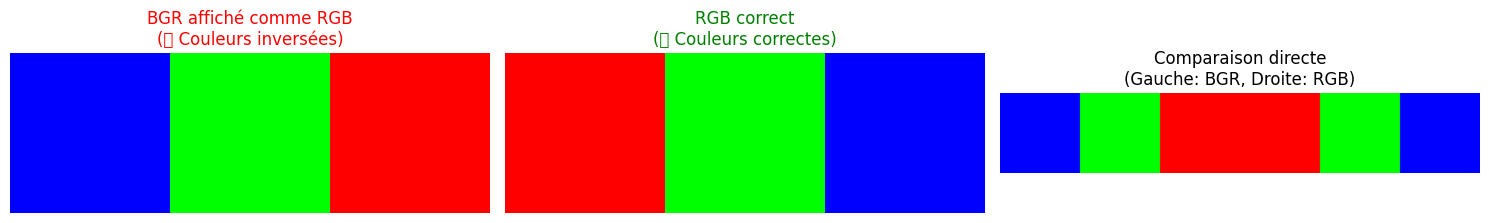


4️⃣ Comparaison des valeurs numériques :

   Pixel [100, 100] (zone rouge) :
   BGR : [  0   0 255] → [Bleu, Vert, Rouge] = [0, 0, 255]
   RGB : [255   0   0] → [Rouge, Vert, Bleu] = [255, 0, 0]

   ⚠️ Les canaux sont inversés !

   Pixel [100, 300] (zone verte) :
   BGR : [  0 255   0] → [Bleu, Vert, Rouge] = [0, 255, 0]
   RGB : [  0 255   0] → [Rouge, Vert, Bleu] = [0, 255, 0]

   ✅ Le vert est identique (canal du milieu)

   Pixel [100, 500] (zone bleue) :
   BGR : [255   0   0] → [Bleu, Vert, Rouge] = [255, 0, 0]
   RGB : [  0   0 255] → [Rouge, Vert, Bleu] = [0, 0, 255]

   ⚠️ Les canaux sont inversés !

5️⃣ Test avec votre vraie image :

   Pixel au centre de l'image [91, 138] :
   BGR : [ 31  55 167] → [Bleu, Vert, Rouge]
   RGB : [167  55  31] → [Rouge, Vert, Bleu]


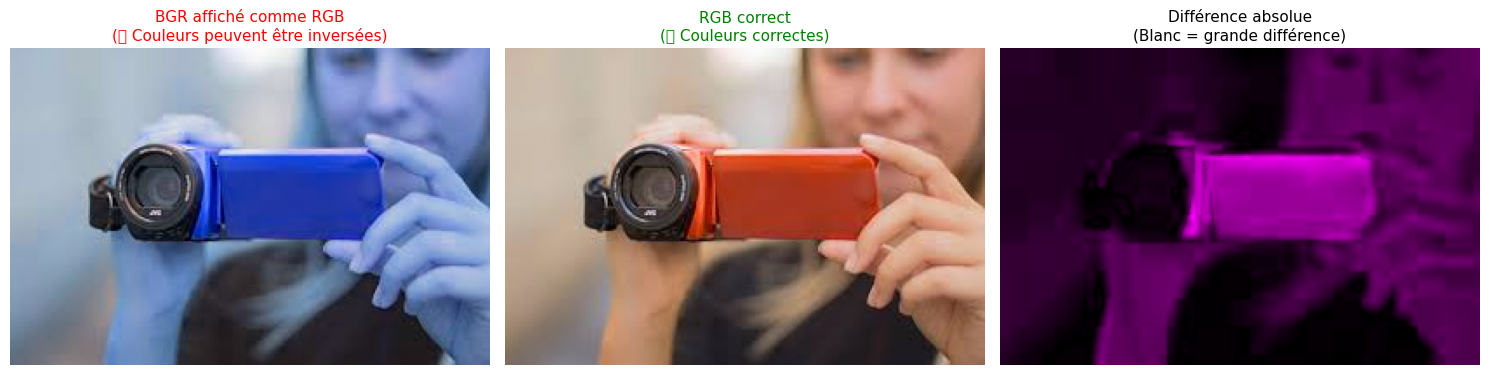


   💡 Si vous voyez une différence dans la 3ème image,
      c'est que les couleurs BGR et RGB sont différentes !

✅ CONCLUSION :

📌 OpenCV charge les images en BGR (Blue, Green, Red)
📌 ResNet50 attend les images en RGB (Red, Green, Blue)
📌 Il FAUT convertir BGR → RGB avant de donner à ResNet50
📌 Sinon, les features extraites seront incorrectes !

💡 La différence visuelle peut être subtile selon l'image,
   mais l'impact sur les features ML est important !



In [ ]:
# 🔍 TEST POUR VOIR LA DIFFÉRENCE BGR vs RGB

print("="*60)
print("🔍 COMPARAISON BGR vs RGB")
print("="*60)

# 1. Créer une image de test avec des couleurs vives
print("\n1️⃣ Création d'une image de test avec couleurs vives...")
test_colors = np.zeros((200, 600, 3), dtype=np.uint8)

# Rouge pur
test_colors[:, 0:200] = [0, 0, 255]  # BGR : [B, G, R] = [0, 0, 255] = Rouge
# Vert pur
test_colors[:, 200:400] = [0, 255, 0]  # BGR : [B, G, R] = [0, 255, 0] = Vert
# Bleu pur
test_colors[:, 400:600] = [255, 0, 0]  # BGR : [B, G, R] = [255, 0, 0] = Bleu

print("   ✅ Image de test créée : Rouge | Vert | Bleu (en BGR)")

# 2. Afficher l'image BGR (sans conversion - matplotlib va l'interpréter comme RGB)
print("\n2️⃣ Affichage BGR (sans conversion) - matplotlib interprète comme RGB...")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(test_colors)  # Affiche sans conversion - les couleurs sont inversées !
plt.title("BGR affiché comme RGB\n(❌ Couleurs inversées)", fontsize=12, color='red')
plt.axis('off')

# 3. Convertir en RGB et afficher
print("3️⃣ Conversion BGR → RGB...")
rgb_colors = cv2.cvtColor(test_colors, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 2)
plt.imshow(rgb_colors)  # Affiche avec conversion - couleurs correctes
plt.title("RGB correct\n(✅ Couleurs correctes)", fontsize=12, color='green')
plt.axis('off')

# 4. Comparaison côte à côte
plt.subplot(1, 3, 3)
comparison = np.hstack([test_colors, rgb_colors])
plt.imshow(comparison)
plt.title("Comparaison directe\n(Gauche: BGR, Droite: RGB)", fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# 5. Comparer les valeurs numériques
print("\n4️⃣ Comparaison des valeurs numériques :")
print("\n   Pixel [100, 100] (zone rouge) :")
print(f"   BGR : {test_colors[100, 100]} → [Bleu, Vert, Rouge] = [0, 0, 255]")
print(f"   RGB : {rgb_colors[100, 100]} → [Rouge, Vert, Bleu] = [255, 0, 0]")
print("\n   ⚠️ Les canaux sont inversés !")

print("\n   Pixel [100, 300] (zone verte) :")
print(f"   BGR : {test_colors[100, 300]} → [Bleu, Vert, Rouge] = [0, 255, 0]")
print(f"   RGB : {rgb_colors[100, 300]} → [Rouge, Vert, Bleu] = [0, 255, 0]")
print("\n   ✅ Le vert est identique (canal du milieu)")

print("\n   Pixel [100, 500] (zone bleue) :")
print(f"   BGR : {test_colors[100, 500]} → [Bleu, Vert, Rouge] = [255, 0, 0]")
print(f"   RGB : {rgb_colors[100, 500]} → [Rouge, Vert, Bleu] = [0, 0, 255]")
print("\n   ⚠️ Les canaux sont inversés !")

# 6. Tester avec votre vraie image
print("\n" + "="*60)
print("5️⃣ Test avec votre vraie image :")
print("="*60)

if 'original_image' in locals() and original_image is not None:
    # Extraire un pixel pour comparer
    h, w = original_image.shape[:2]
    center_pixel_bgr = original_image[h//2, w//2]
    center_pixel_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)[h//2, w//2]
    
    print(f"\n   Pixel au centre de l'image [{h//2}, {w//2}] :")
    print(f"   BGR : {center_pixel_bgr} → [Bleu, Vert, Rouge]")
    print(f"   RGB : {center_pixel_rgb} → [Rouge, Vert, Bleu]")
    
    # Afficher la différence visuelle
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    # Afficher BGR sans conversion (matplotlib va mal l'interpréter)
    plt.imshow(original_image)  # ❌ Couleurs inversées
    plt.title("BGR affiché comme RGB\n(❌ Couleurs peuvent être inversées)", 
              fontsize=11, color='red')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    # Afficher RGB correctement
    rgb_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_original)  # ✅ Couleurs correctes
    plt.title("RGB correct\n(✅ Couleurs correctes)", 
              fontsize=11, color='green')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    # Différence absolue
    diff = np.abs(original_image.astype(float) - rgb_original.astype(float))
    diff_normalized = (diff / diff.max() * 255).astype(np.uint8)
    plt.imshow(diff_normalized)
    plt.title("Différence absolue\n(Blanc = grande différence)", 
              fontsize=11)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n   💡 Si vous voyez une différence dans la 3ème image,")
    print("      c'est que les couleurs BGR et RGB sont différentes !")
else:
    print("   ⚠️ Aucune image de test disponible")

print("\n" + "="*60)
print("✅ CONCLUSION :")
print("="*60)
print("""
📌 OpenCV charge les images en BGR (Blue, Green, Red)
📌 ResNet50 attend les images en RGB (Red, Green, Blue)
📌 Il FAUT convertir BGR → RGB avant de donner à ResNet50
📌 Sinon, les features extraites seront incorrectes !

💡 La différence visuelle peut être subtile selon l'image,
   mais l'impact sur les features ML est important !
""")


## ✅ ÉTAPE 3 : VALIDATION DES FORMATS D'IMAGE


In [ ]:
def validate_image_format(image_path):
    """
    Vérifie que le fichier est un format d'image valide
    
    Args:
        image_path: Chemin vers l'image
    
    Returns:
        bool: True si le format est valide
    """
    if not os.path.exists(image_path):
        return False
    
    ext = os.path.splitext(image_path)[1]
    return ext in ALLOWED_FORMATS

# 🔍 DIAGNOSTIC : Vérifier le répertoire de travail
print("🔍 DIAGNOSTIC : Répertoire de travail")
print("="*60)
print(f"📁 Répertoire de travail actuel : {os.getcwd()}")

# Construire le chemin vers public/
project_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
public_dir = project_root / "public"

print(f"📁 Project root : {project_root}")
print(f"📁 Public dir : {public_dir}")
print(f"📁 Public existe : {public_dir.exists()}")

# Lister les fichiers dans public/
if public_dir.exists():
    print(f"\n📋 Fichiers dans public/ :")
    for file in public_dir.iterdir():
        if file.is_file():
            print(f"   ✅ {file.name}")

# Test de validation avec de VRAIS fichiers
print("\n" + "="*60)
print("📋 Test de validation des formats :")
print("="*60)

# Tester avec les fichiers de test_images (qui existent dans test_images)
if 'test_images' in locals():
    print("\n✅ Test avec les images de test_images :")
    for img_path in test_images:
        # Essayer le chemin tel quel
        exists = os.path.exists(img_path)
        
        # Si le chemin relatif ne fonctionne pas, essayer depuis project_root
        if not exists:
            img_name = Path(img_path).name
            abs_path = public_dir / img_name
            exists = abs_path.exists()
            final_path = str(abs_path) if exists else img_path
        else:
            final_path = img_path
        
        is_valid = validate_image_format(final_path) if exists else False
        status = "✅" if is_valid else "❌"
        exists_status = "✅ Existe" if exists else "❌ N'existe pas"
        
        print(f"\n   {status} {img_path}")
        print(f"      → {exists_status}")
        if exists:
            print(f"      → Chemin utilisé : {final_path}")
        print(f"      → Format valide : {is_valid}")

# Tester avec des extensions seulement (pour montrer la logique)
print("\n📝 Test de la logique (extensions seulement) :")
test_extensions = [
    (".png", True),
    (".jpg", True),
    (".jpeg", True),
    (".txt", False),
    (".pdf", False),
    (".svg", False),
]

for ext, should_be_valid in test_extensions:
    ext_valid = ext in ALLOWED_FORMATS
    status = "✅" if ext_valid == should_be_valid else "❌"
    print(f"   {status} Extension {ext}: {'Valide' if ext_valid else 'Non supportée'}")

print("\n💡 EXPLICATION :")
print("   La fonction vérifie DEUX choses :")
print("   1. Le fichier existe (os.path.exists)")
print("   2. L'extension est valide (.png, .jpg, etc.)")
print("   Si le fichier n'existe pas, elle retourne False même si l'extension est valide.")


🔍 DIAGNOSTIC : Répertoire de travail
📁 Répertoire de travail actuel : C:\Users\espacegamers\ecommerce-cbir-project\notebooks
📁 Project root : C:\Users\espacegamers\ecommerce-cbir-project
📁 Public dir : C:\Users\espacegamers\ecommerce-cbir-project\public
📁 Public existe : True

📋 Fichiers dans public/ :
   ✅ apple-icon.png
   ✅ icon-dark-32x32.png
   ✅ icon-light-32x32.png
   ✅ icon.svg
   ✅ image2.jpg
   ✅ pcvhg.jpg
   ✅ placeholder-logo.png
   ✅ placeholder-logo.svg
   ✅ placeholder-user.jpg
   ✅ placeholder.jpg
   ✅ placeholder.svg
   ✅ test_image.jpg

📋 Test de validation des formats :

✅ Test avec les images de test_images :

   ✅ ../public/image2.jpg
      → ✅ Existe
      → Chemin utilisé : ../public/image2.jpg
      → Format valide : True

   ❌ ../public/placeholder.svg
      → ✅ Existe
      → Chemin utilisé : ../public/placeholder.svg
      → Format valide : False

   ❌ ../public/téléchargement (24).jpg
      → ❌ N'existe pas
      → Format valide : False

📝 Test de la logique

## 🔍 ÉTAPE 4 : VÉRIFICATION DE L'INTÉGRITÉ DES IMAGES


In [ ]:
def is_image_valid(image_path):
    """
    Vérifie si l'image n'est pas corrompue
    
    Args:
        image_path: Chemin vers l'image
    
    Returns:
        bool: True si l'image est valide
    """
    try:
        # Essayer d'ouvrir avec PIL
        img = Image.open(image_path)
        img.verify()  # Vérifie l'intégrité du fichier
        
        # Essayer aussi avec OpenCV
        img_cv = cv2.imread(image_path)
        if img_cv is None:
            return False
        
        return True
    except Exception as e:
        print(f"❌ Image corrompue : {e}")
        return False

# Test avec l'image de test
if test_image_path and os.path.exists(test_image_path):
    is_valid = is_image_valid(test_image_path)
    print(f"🔍 Image valide : {is_valid}")
else:
    print("⚠️ Aucune image de test disponible")


🔍 Image valide : True


## 🔄 ÉTAPE 5 : CORRECTION DE L'ORIENTATION EXIF


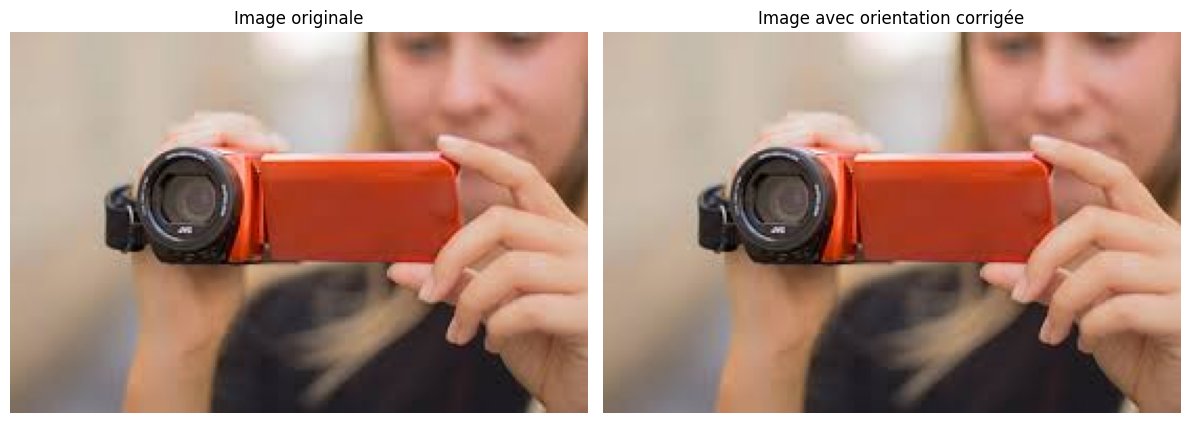

✅ Correction d'orientation testée


In [ ]:
def correct_image_orientation(image_path):
    """
    Corrige l'orientation de l'image selon les données EXIF
    
    Args:
        image_path: Chemin vers l'image
    
    Returns:
        PIL.Image: Image corrigée
    """
    try:
        image = Image.open(image_path)
        
        # Utiliser ImageOps pour auto-orientation (plus simple)
        image = ImageOps.exif_transpose(image)
        
        return image
    except Exception as e:
        print(f"⚠️ Erreur lors de la correction d'orientation : {e}")
        # Retourner l'image originale si erreur
        return Image.open(image_path)

# Test de correction d'orientation
if test_image_path and os.path.exists(test_image_path):
    corrected_image = correct_image_orientation(test_image_path)
    
    # Afficher avant/après
    original_pil = Image.open(test_image_path)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_pil)
    plt.title("Image originale")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image)
    plt.title("Image avec orientation corrigée")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Correction d'orientation testée")
else:
    print("⚠️ Aucune image de test disponible")


## 🎨 ÉTAPE 6 : GESTION DE LA TRANSPARENCE (ALPHA CHANNEL)


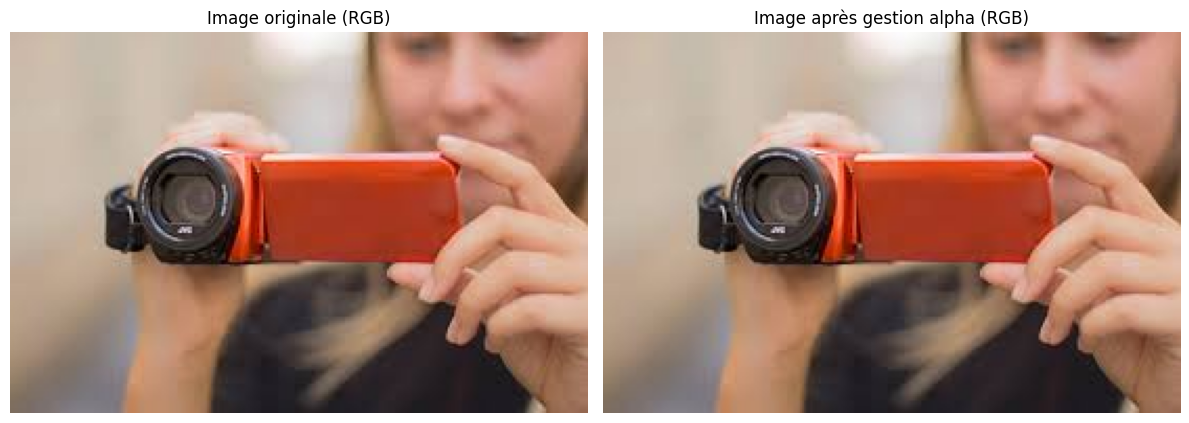

✅ Gestion de la transparence testée
💡 Note : L'image devrait être identique car le canal alpha est opaque (255)


In [ ]:
def handle_alpha_channel(image):
    """
    Gère les images avec canal alpha (transparence)
    Convertit RGBA en RGB avec fond blanc
    
    Args:
        image: Image numpy array (peut être RGBA)
    
    Returns:
        numpy.ndarray: Image RGB
    """
    if len(image.shape) == 2:
        # Image en niveaux de gris, convertir en RGB
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 4:
        # Image RGBA, convertir en RGB avec fond blanc
        # Séparer les canaux
        rgb = image[:, :, :3]
        alpha = image[:, :, 3] / 255.0
        
        # Créer un fond blanc
        white_background = np.ones_like(rgb) * 255
        
        # Combiner avec transparence
        image = (rgb * alpha[:, :, np.newaxis] + white_background * (1 - alpha[:, :, np.newaxis])).astype(np.uint8)
    elif image.shape[2] == 3:
        # Déjà en RGB, rien à faire
        pass
    
    return image

# Test avec une image (simulation d'alpha channel)
if 'original_image' in locals() and original_image is not None:
    # ⚠️ CORRECTION : Convertir en RGB d'abord !
    # original_image est en BGR (de cv2.imread), on doit convertir en RGB
    rgb_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Simuler une image avec alpha (en RGB maintenant, pas BGR)
    test_with_alpha = np.dstack([rgb_image, np.ones((rgb_image.shape[0], rgb_image.shape[1]), dtype=np.uint8) * 255])
    
    processed = handle_alpha_channel(test_with_alpha)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_image)  # Déjà en RGB
    plt.title("Image originale (RGB)")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(processed)  # Maintenant en RGB aussi
    plt.title("Image après gestion alpha (RGB)")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Gestion de la transparence testée")
    print("💡 Note : L'image devrait être identique car le canal alpha est opaque (255)")
else:
    print("⚠️ Aucune image de test disponible")


## 📐 ÉTAPE 7 : REDIMENSIONNEMENT INTELLIGENT (MAINTENIR ASPECT RATIO)


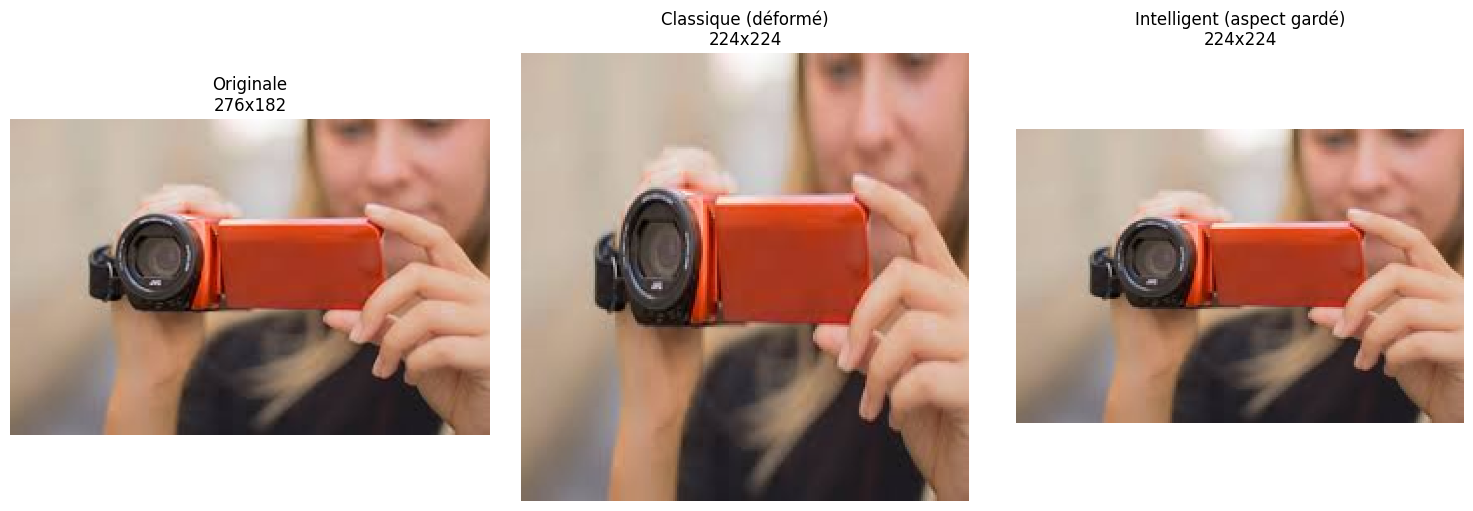

✅ Redimensionnement intelligent testé
   Ratio original : 1.52
   Ratio classique : 1.00
   Ratio intelligent : 1.00


In [ ]:
def smart_resize(image, target_size=(224, 224), padding_color=(255, 255, 255)):
    """
    Redimensionne l'image en gardant le ratio d'aspect
    Ajoute du padding si nécessaire
    
    Args:
        image: Image numpy array
        target_size: Taille cible (height, width)
        padding_color: Couleur du padding (RGB)
    
    Returns:
        numpy.ndarray: Image redimensionnée
    """
    h, w = image.shape[:2]
    target_h, target_w = target_size
    
    # Calculer le ratio pour garder l'aspect
    ratio = min(target_h / h, target_w / w)
    new_h, new_w = int(h * ratio), int(w * ratio)
    
    # Redimensionner
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    
    # Créer l'image finale avec padding
    if len(resized.shape) == 2:
        # Image en niveaux de gris
        final_image = np.full((target_h, target_w), padding_color[0], dtype=np.uint8)
    else:
        # Image couleur
        final_image = np.full((target_h, target_w, 3), padding_color, dtype=np.uint8)
    
    # Calculer la position pour centrer l'image
    top = (target_h - new_h) // 2
    left = (target_w - new_w) // 2
    
    # Placer l'image redimensionnée au centre
    if len(resized.shape) == 2:
        final_image[top:top+new_h, left:left+new_w] = resized
    else:
        final_image[top:top+new_h, left:left+new_w, :] = resized
    
    return final_image

# Test du redimensionnement intelligent
if 'original_image' in locals() and original_image is not None:
    # Redimensionnement classique (déforme)
    resized_classic = cv2.resize(original_image, TARGET_SIZE)
    
    # Redimensionnement intelligent (garde l'aspect)
    resized_smart = smart_resize(original_image, TARGET_SIZE)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Originale\n{original_image.shape[1]}x{original_image.shape[0]}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(resized_classic, cv2.COLOR_BGR2RGB))
    plt.title(f"Classique (déformé)\n{TARGET_SIZE[1]}x{TARGET_SIZE[0]}")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(resized_smart, cv2.COLOR_BGR2RGB))
    plt.title(f"Intelligent (aspect gardé)\n{TARGET_SIZE[1]}x{TARGET_SIZE[0]}")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Redimensionnement intelligent testé")
    print(f"   Ratio original : {original_image.shape[1]/original_image.shape[0]:.2f}")
    print(f"   Ratio classique : {resized_classic.shape[1]/resized_classic.shape[0]:.2f}")
    print(f"   Ratio intelligent : {resized_smart.shape[1]/resized_smart.shape[0]:.2f}")
else:
    print("⚠️ Aucune image de test disponible")


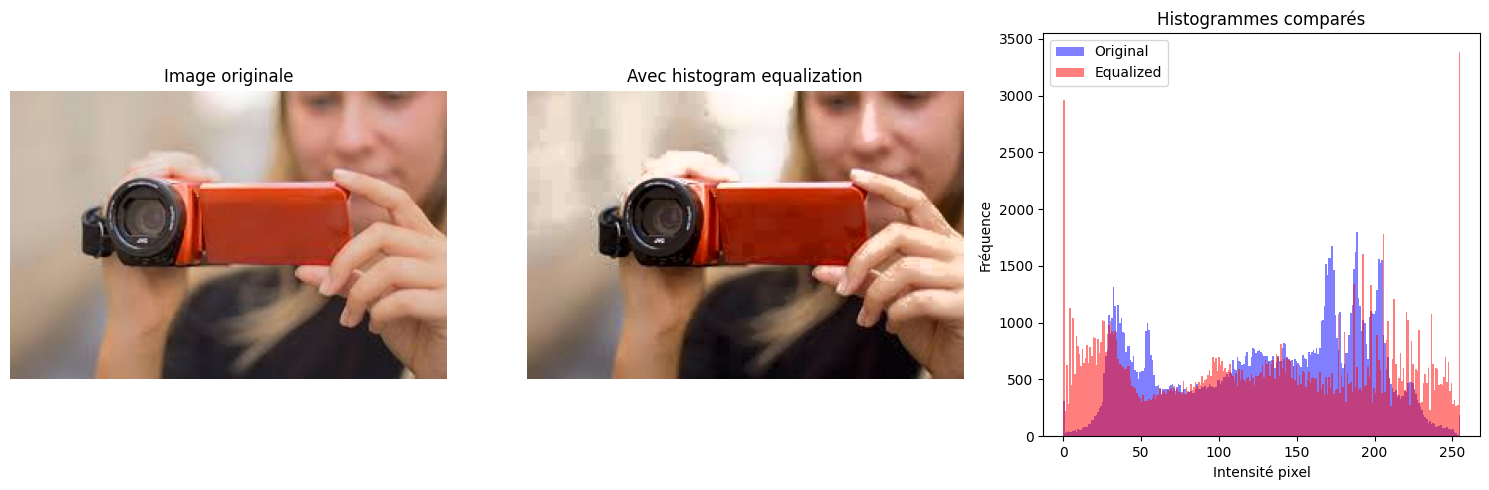

✅ Histogram equalization testé


In [ ]:
def apply_histogram_equalization(image):
    """
    Améliore le contraste avec histogram equalization
    
    Args:
        image: Image numpy array (RGB)
    
    Returns:
        numpy.ndarray: Image avec contraste amélioré
    """
    # Convertir en YUV
    yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    
    # Appliquer equalization sur le canal Y (luminosité)
    yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
    
    # Reconvertir en RGB
    equalized = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    
    return equalized

# Test de l'histogram equalization
if 'original_image' in locals() and original_image is not None:
    rgb_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    equalized = apply_histogram_equalization(rgb_original)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_original)
    plt.title("Image originale")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(equalized)
    plt.title("Avec histogram equalization")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    # Afficher les histogrammes
    plt.hist(rgb_original.ravel(), bins=256, alpha=0.5, label='Original', color='blue')
    plt.hist(equalized.ravel(), bins=256, alpha=0.5, label='Equalized', color='red')
    plt.xlabel('Intensité pixel')
    plt.ylabel('Fréquence')
    plt.title('Histogrammes comparés')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Histogram equalization testé")
else:
    print("⚠️ Aucune image de test disponible")


## 🔄 ÉTAPE 9 : AUGMENTATION DE DONNÉES (POUR LE DATASET)


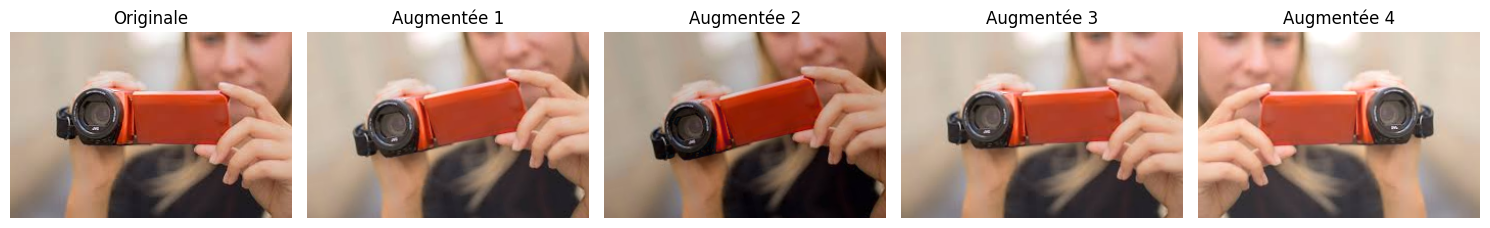

✅ Augmentation de données testée


In [ ]:
import random

def augment_image(image, rotation_range=15, flip_prob=0.5, brightness_range=0.2):
    """
    Applique des transformations d'augmentation de données
    
    Args:
        image: Image numpy array (RGB)
        rotation_range: Angle de rotation max en degrés
        flip_prob: Probabilité de flip horizontal
        brightness_range: Variation de luminosité (0-1)
    
    Returns:
        numpy.ndarray: Image augmentée
    """
    augmented = image.copy()
    
    # 1. Rotation aléatoire
    angle = random.uniform(-rotation_range, rotation_range)
    h, w = augmented.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    augmented = cv2.warpAffine(augmented, M, (w, h), borderMode=cv2.BORDER_REFLECT)
    
    # 2. Flip horizontal (avec probabilité)
    if random.random() < flip_prob:
        augmented = cv2.flip(augmented, 1)
    
    # 3. Ajustement de luminosité
    brightness_factor = 1 + random.uniform(-brightness_range, brightness_range)
    augmented = cv2.convertScaleAbs(augmented, alpha=1, beta=(brightness_factor - 1) * 128)
    
    return augmented

# Test de l'augmentation
if 'original_image' in locals() and original_image is not None:
    rgb_original = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Créer plusieurs versions augmentées
    augmented_images = [augment_image(rgb_original) for _ in range(4)]
    
    plt.figure(figsize=(15, 3))
    
    plt.subplot(1, 5, 1)
    plt.imshow(rgb_original)
    plt.title("Originale")
    plt.axis('off')
    
    for i, aug_img in enumerate(augmented_images):
        plt.subplot(1, 5, i+2)
        plt.imshow(aug_img)
        plt.title(f"Augmentée {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Augmentation de données testée")
else:
    print("⚠️ Aucune image de test disponible")


## 🔧 ÉTAPE 10 : FONCTION COMPLÈTE DE PRÉTRAITEMENT


✅ Prétraitement complet réussi !
   Shape finale : (1, 224, 224, 3)
   Type : float32
   Min : 0.000, Max : 1.000


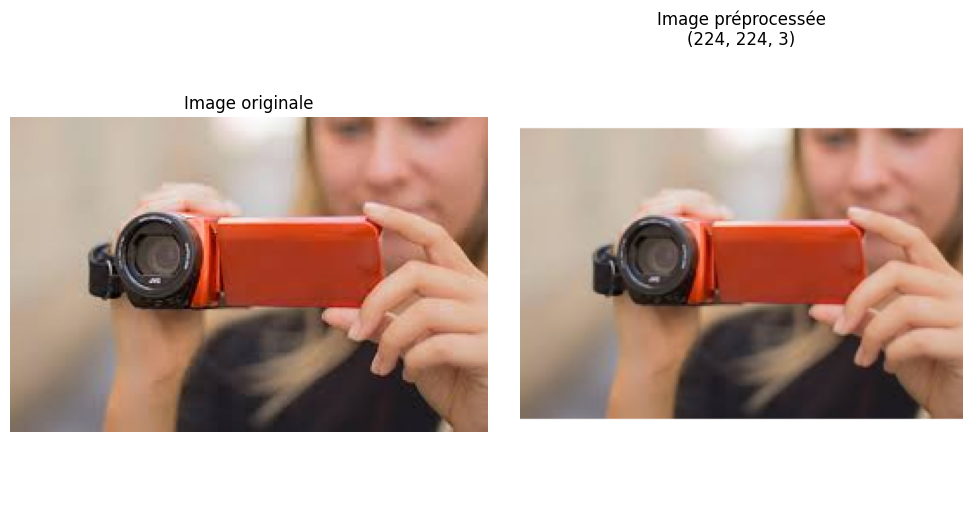

In [ ]:
def load_and_preprocess_image_complete(image_path, target_size=(224, 224), 
                                       apply_equalization=False, 
                                       apply_augmentation=False):
    """
    Fonction complète de prétraitement avec toutes les améliorations
    
    Args:
        image_path: Chemin vers l'image
        target_size: Taille cible
        apply_equalization: Appliquer histogram equalization
        apply_augmentation: Appliquer augmentation de données
    
    Returns:
        numpy.ndarray: Image préprocessée (normalisée 0-1)
    """
    # 1. Valider le format
    if not validate_image_format(image_path):
        raise ValueError(f"Format d'image non supporté : {image_path}")
    
    # 2. Vérifier l'intégrité
    if not is_image_valid(image_path):
        raise ValueError(f"Image corrompue : {image_path}")
    
    # 3. Corriger l'orientation EXIF
    pil_image = correct_image_orientation(image_path)
    
    # 4. Convertir PIL en numpy array
    image = np.array(pil_image)
    
    # 5. Gérer la transparence
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    elif image.shape[2] == 4:
        image = handle_alpha_channel(image)
    
    # 6. Convertir en RGB si nécessaire (PIL retourne déjà RGB)
    
    # 7. Redimensionnement intelligent
    image = smart_resize(image, target_size)
    
    # 8. Histogram equalization (optionnel)
    if apply_equalization:
        image = apply_histogram_equalization(image)
    
    # 9. Augmentation (optionnel)
    if apply_augmentation:
        image = augment_image(image)
    
    # 10. Normalisation (0-1)
    image = image.astype('float32') / 255.0
    
    # 11. Ajouter dimension batch
    image = np.expand_dims(image, axis=0)
    
    return image

# Test de la fonction complète
if test_image_path and os.path.exists(test_image_path):
    try:
        processed = load_and_preprocess_image_complete(
            test_image_path, 
            target_size=TARGET_SIZE,
            apply_equalization=False,
            apply_augmentation=False
        )
        
        print(f"✅ Prétraitement complet réussi !")
        print(f"   Shape finale : {processed.shape}")
        print(f"   Type : {processed.dtype}")
        print(f"   Min : {processed.min():.3f}, Max : {processed.max():.3f}")
        
        # Afficher l'image finale
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        if 'original_image' in locals():
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        else:
            orig_pil = Image.open(test_image_path)
            plt.imshow(orig_pil)
        plt.title("Image originale")
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        # Retirer la dimension batch pour l'affichage
        display_img = processed[0]
        plt.imshow(display_img)
        plt.title(f"Image préprocessée\n{display_img.shape}")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erreur lors du prétraitement : {e}")
        import traceback
        traceback.print_exc()
else:
    print("⚠️ Aucune image de test disponible")


📊 Performance (sur 10 tests) :
   Temps moyen : 2.93 ms
   Temps min : 1.81 ms
   Temps max : 4.45 ms
   ✅ Critère respecté (< 100ms)


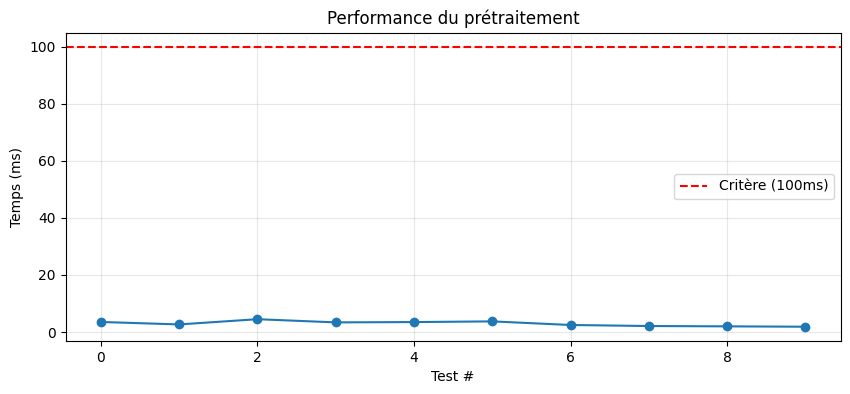

In [ ]:
import time

# Test de performance
if test_image_path and os.path.exists(test_image_path):
    num_tests = 10
    times = []
    
    for i in range(num_tests):
        start = time.time()
        try:
            processed = load_and_preprocess_image_complete(
                test_image_path,
                target_size=TARGET_SIZE
            )
            elapsed = time.time() - start
            times.append(elapsed * 1000)  # Convertir en ms
        except Exception as e:
            print(f"Erreur au test {i+1}: {e}")
    
    if times:
        avg_time = np.mean(times)
        min_time = np.min(times)
        max_time = np.max(times)
        
        print(f"📊 Performance (sur {num_tests} tests) :")
        print(f"   Temps moyen : {avg_time:.2f} ms")
        print(f"   Temps min : {min_time:.2f} ms")
        print(f"   Temps max : {max_time:.2f} ms")
        
        # Critère de validation : < 100ms
        if avg_time < 100:
            print(f"   ✅ Critère respecté (< 100ms)")
        else:
            print(f"   ⚠️ Temps supérieur à 100ms, optimisation nécessaire")
        
        # Graphique
        plt.figure(figsize=(10, 4))
        plt.plot(times, marker='o')
        plt.axhline(y=100, color='r', linestyle='--', label='Critère (100ms)')
        plt.xlabel('Test #')
        plt.ylabel('Temps (ms)')
        plt.title('Performance du prétraitement')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
else:
    print("⚠️ Aucune image de test disponible")


## 📝 ÉTAPE 12 : RÉSUMÉ ET PROCHAINES ÉTAPES


In [17]:
print("""
✅ FONCTIONS DÉVELOPPÉES ET TESTÉES :

1. ✅ Validation des formats d'image
2. ✅ Vérification de l'intégrité
3. ✅ Correction de l'orientation EXIF
4. ✅ Gestion de la transparence (alpha channel)
5. ✅ Redimensionnement intelligent (aspect ratio)
6. ✅ Histogram equalization (optionnel)
7. ✅ Augmentation de données
8. ✅ Fonction complète de prétraitement

📋 PROCHAINES ÉTAPES :

1. Copier le code final dans backend/services/preprocessing.py
2. Adapter pour la production (gestion d'erreurs robuste)
3. Créer des tests unitaires
4. Tester avec le dataset complet

💡 ASTUCE :
   - Gardez ce notebook comme documentation
   - Utilisez les visualisations pour présenter votre travail
   - Le code ici peut être copié directement dans preprocessing.py
""")



✅ FONCTIONS DÉVELOPPÉES ET TESTÉES :

1. ✅ Validation des formats d'image
2. ✅ Vérification de l'intégrité
3. ✅ Correction de l'orientation EXIF
4. ✅ Gestion de la transparence (alpha channel)
5. ✅ Redimensionnement intelligent (aspect ratio)
6. ✅ Histogram equalization (optionnel)
7. ✅ Augmentation de données
8. ✅ Fonction complète de prétraitement

📋 PROCHAINES ÉTAPES :

1. Copier le code final dans backend/services/preprocessing.py
2. Adapter pour la production (gestion d'erreurs robuste)
3. Créer des tests unitaires
4. Tester avec le dataset complet

💡 ASTUCE :
   - Gardez ce notebook comme documentation
   - Utilisez les visualisations pour présenter votre travail
   - Le code ici peut être copié directement dans preprocessing.py

